In [40]:
import json
from matplotlib.font_manager import json_dump
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
from datetime import datetime
import time
import seaborn as sns
import matplotlib.pylab as plt
import os
  
# Folder Path


sf_data = []
vicon_data = []
dataset_name = "run_diagonal_2"
path_sf = "/media/irfan-flw/DATA/Arbeit/6GEM/Program_Development/6GEM_Dataset/sensorfloor_measurement/30092022"
file_name_sf = "sensor_floor_data_30092022_" + dataset_name + ".txt"

os.chdir(path_sf)
#file_path = f"{path}\{file_name}"
# threshold_sf_up = 1662115152.8
# threshold_sf_down = 1662115256
# threshold_vc_up = 1662115153.7486753
# threshold_vc_down = 1662115255.375461

#for line in open("../Dataset_sensor_floor/sensorfloor_measurement/16092022/sensor_floor_data_16092022_" + dataset_name + ".txt", "r"):
#for line in open("../../../media/irfan-flw/OS/Arbeit/6GEM/Program_Development/6GEM_Dataset/sensorfloor_measurement/16092022/sensor_floor_data_16092022_" + dataset_name + ".txt", "r"):
for line in open(file_name_sf, "r"):
    sf_data.append(json.loads(line))

df_sf = pd.DataFrame(sf_data)
df_sf

,timestamp,strip_id,node_id,data,column_num
0,1.664543e+09,20,3,"[{'a': [0.04296875, 0.135009765625, 1.03271484...",20
1,1.664543e+09,8,9,"[{'a': [0.056884765625, 0.0654296875, 1.043457...",8
2,1.664543e+09,5,3,"[{'a': [0.084228515625, 0.1669921875, 1.032226...",5
3,1.664543e+09,17,9,"[{'a': [0.050048828125, 0.09619140625, 1.00976...",17
4,1.664543e+09,2,8,"[{'a': [0.052490234375, 0.12060546875, 1.00219...",2
...,...,...,...,...,...
19989,1.664543e+09,1,1,"[{'a': [0.051513671875, 0.17431640625, 0.99389...",1
19990,1.664543e+09,11,12,"[{'a': [0.064208984375, 0.15087890625, 0.97363...",11
19991,1.664543e+09,5,14,"[{'a': [0.028564453125, 0.130859375, 1.0551757...",5
19992,1.664543e+09,20,11,"[{'a': [0.046142578125, 0.073974609375, 1.0654...",20


## Build the dataframe of sensor floors ##

***Timestamp Interpolation***

In [ ]:
# #test timestamp interpolation
# #t_batch_i_now = np.zeros((23,15))
# t_batch_i_old = np.zeros((23,15))
# df_sf_buf = df_sf.copy()


# #df_sf_buf = df_sf_buf.reindex(df_sf_buf.columns.tolist() + ['ax','ay','az','gx','gy','gz','mx','my','mz','rssi'], axis=1) 
# out = []
# for index, row in df_sf_buf.T.items():
#     index_strip_id = int(df_sf_buf['strip_id'][index])
#     index_node_id = int(df_sf_buf['node_id'][index])
#     print('t_batch: ', df_sf_buf['timestamp'][index])
#     #t_batch_i_now[index_strip_id][index_node_id] = df_sf_buf['timestamp'][index]
#     #print(t_batch_i_old[index_strip_id-1][index_node_id-1])
#     delta_t = 0
#     timestamp_i = 0

#     #check timestamp
#     if t_batch_i_old[index_strip_id-1][index_node_id-1] < df_sf_buf['timestamp'][index] and t_batch_i_old[index_strip_id-1][index_node_id-1] > 0:
#         delta_t = (df_sf_buf['timestamp'][index] - t_batch_i_old[index_strip_id-1][index_node_id-1])/len(df_sf_buf['data'][index])
        
#         for i in range(len(df_sf_buf['data'][index])):
#             t_i = t_batch_i_old[index_strip_id-1][index_node_id-1] + ((1+i)*delta_t)
#             if df_sf_buf['data'][index][i]['r'][0] < 0:
#                 #print('iter > 0: ', delta_t)
#                 out.append({'strip_id':df_sf_buf['strip_id'][index],'node_id':df_sf_buf['node_id'][index],
#                     'ax':df_sf_buf['data'][index][i]['a'][0],'ay':df_sf_buf['data'][index][i]['a'][1],'az':df_sf_buf['data'][index][i]['a'][2],
#                     'gx':df_sf_buf['data'][index][i]['g'][0],'gy':df_sf_buf['data'][index][i]['g'][1],'gz':df_sf_buf['data'][index][i]['g'][2],
#                     'mx':df_sf_buf['data'][index][i]['m'][0],'my':df_sf_buf['data'][index][i]['m'][1],'mz':df_sf_buf['data'][index][i]['m'][2],
#                     'r':df_sf_buf['data'][index][i]['r'][0],'timestamp':t_i})
#             else:
#                 out.append({'strip_id':df_sf_buf['strip_id'][index],'node_id':df_sf_buf['node_id'][index],
#                     'ax':df_sf_buf['data'][index][i]['a'][0],'ay':df_sf_buf['data'][index][i]['a'][1],'az':df_sf_buf['data'][index][i]['a'][2],
#                     'gx':df_sf_buf['data'][index][i]['g'][0],'gy':df_sf_buf['data'][index][i]['g'][1],'gz':df_sf_buf['data'][index][i]['g'][2],
#                     'mx':df_sf_buf['data'][index][i]['m'][0],'my':df_sf_buf['data'][index][i]['m'][1],'mz':df_sf_buf['data'][index][i]['m'][2],
#                     'r':np.nan,'timestamp':t_i})
#             #print(out[index]['strip_id'], out[index]['node_id'],'t_old: ', t_batch_i_old[index_strip_id-1][index_node_id-1], 't_now: ', df_sf_buf['timestamp'][index], out[index]['timestamp'])
#         # t_batch_i_old[index_strip_id-1][index_node_id-1] = df_sf_buf['timestamp'][index]

#     elif t_batch_i_old[index_strip_id-1][index_node_id-1] == 0:
#         delta_t = 4/19
#         #print('iter 0: ', delta_t)
#         for i in range(len(df_sf_buf['data'][index])):
#             t_i = (df_sf_buf['timestamp'][index]-4) + ((1+i)*delta_t)
#             if df_sf_buf['data'][index][i]['r'][0] < 0:
#                 #print(t_i)
#                 out.append({'strip_id':df_sf_buf['strip_id'][index],'node_id':df_sf_buf['node_id'][index],
#                     'ax':df_sf_buf['data'][index][i]['a'][0],'ay':df_sf_buf['data'][index][i]['a'][1],'az':df_sf_buf['data'][index][i]['a'][2],
#                     'gx':df_sf_buf['data'][index][i]['g'][0],'gy':df_sf_buf['data'][index][i]['g'][1],'gz':df_sf_buf['data'][index][i]['g'][2],
#                     'mx':df_sf_buf['data'][index][i]['m'][0],'my':df_sf_buf['data'][index][i]['m'][1],'mz':df_sf_buf['data'][index][i]['m'][2],
#                     'r':df_sf_buf['data'][index][i]['r'][0],'timestamp':t_i})
#             else:
#                 out.append({'strip_id':df_sf_buf['strip_id'][index],'node_id':df_sf_buf['node_id'][index],
#                     'ax':df_sf_buf['data'][index][i]['a'][0],'ay':df_sf_buf['data'][index][i]['a'][1],'az':df_sf_buf['data'][index][i]['a'][2],
#                     'gx':df_sf_buf['data'][index][i]['g'][0],'gy':df_sf_buf['data'][index][i]['g'][1],'gz':df_sf_buf['data'][index][i]['g'][2],
#                     'mx':df_sf_buf['data'][index][i]['m'][0],'my':df_sf_buf['data'][index][i]['m'][1],'mz':df_sf_buf['data'][index][i]['m'][2],
#                     'r':np.nan,'timestamp':t_i})
#             print(out[index]['strip_id'], out[index]['node_id'],'t_old: ', t_batch_i_old[index_strip_id-1][index_node_id-1], 't_now: ', df_sf_buf['timestamp'][index], out[index]['timestamp'])
#         t_first = (df_sf_buf['timestamp'][index]) - 4           
#         t_batch_i_old[index_strip_id-1][index_node_id-1] = t_first
#         #print(t_batch_i_old[index_strip_id-1][index_node_id-1])
    
    
#     t_batch_i_old[index_strip_id-1][index_node_id-1] = df_sf_buf['timestamp'][index]    
#     #print(out[index]['strip_id'], out[index]['node_id'],'t_old: ', t_batch_i_old[index_strip_id-1][index_node_id-1], 't_now: ', df_sf_buf['timestamp'][index], out[index]['timestamp'])
        

# df_sf_final = pd.DataFrame(out)
# out.clear()
# df_sf_final

In [54]:
#test timestamp interpolation
#t_batch_i_now = np.zeros((23,15))
t_batch_i_old = np.zeros((23,15))
df_sf_buf = df_sf.copy()


#df_sf_buf = df_sf_buf.reindex(df_sf_buf.columns.tolist() + ['ax','ay','az','gx','gy','gz','mx','my','mz','rssi'], axis=1) 
out = []
for index, row in df_sf_buf.T.items():
    index_strip_id = int(df_sf_buf['strip_id'][index])
    index_node_id = int(df_sf_buf['node_id'][index])
    #print('t_batch: ', df_sf_buf['timestamp'][index])
    #t_batch_i_now[index_strip_id][index_node_id] = df_sf_buf['timestamp'][index]
    #print(t_batch_i_old[index_strip_id-1][index_node_id-1])
    delta_t = 0
    timestamp_i = 0

    for i in range(len(df_sf_buf['data'][index])):

        #check timestamp
        if t_batch_i_old[index_strip_id-1][index_node_id-1] < df_sf_buf['timestamp'][index] and t_batch_i_old[index_strip_id-1][index_node_id-1] > 0:
            delta_t = (df_sf_buf['timestamp'][index] - t_batch_i_old[index_strip_id-1][index_node_id-1])/len(df_sf_buf['data'][index])
            
            t_i = t_batch_i_old[index_strip_id-1][index_node_id-1] + ((1+i)*delta_t)
            if df_sf_buf['data'][index][i]['r'][0] < 0:
                #print('iter > 0: ', delta_t)
                out.append({'strip_id':df_sf_buf['strip_id'][index],'node_id':df_sf_buf['node_id'][index],
                    'ax':df_sf_buf['data'][index][i]['a'][0],'ay':df_sf_buf['data'][index][i]['a'][1],'az':df_sf_buf['data'][index][i]['a'][2],
                    'gx':df_sf_buf['data'][index][i]['g'][0],'gy':df_sf_buf['data'][index][i]['g'][1],'gz':df_sf_buf['data'][index][i]['g'][2],
                    'mx':df_sf_buf['data'][index][i]['m'][0],'my':df_sf_buf['data'][index][i]['m'][1],'mz':df_sf_buf['data'][index][i]['m'][2],
                    'r':df_sf_buf['data'][index][i]['r'][0],'timestamp':t_i})
            else:
                out.append({'strip_id':df_sf_buf['strip_id'][index],'node_id':df_sf_buf['node_id'][index],
                    'ax':df_sf_buf['data'][index][i]['a'][0],'ay':df_sf_buf['data'][index][i]['a'][1],'az':df_sf_buf['data'][index][i]['a'][2],
                    'gx':df_sf_buf['data'][index][i]['g'][0],'gy':df_sf_buf['data'][index][i]['g'][1],'gz':df_sf_buf['data'][index][i]['g'][2],
                    'mx':df_sf_buf['data'][index][i]['m'][0],'my':df_sf_buf['data'][index][i]['m'][1],'mz':df_sf_buf['data'][index][i]['m'][2],
                    'r':np.nan,'timestamp':t_i})
                #print(out[index]['strip_id'], out[index]['node_id'],'t_old: ', t_batch_i_old[index_strip_id-1][index_node_id-1], 't_now: ', df_sf_buf['timestamp'][index], out[index]['timestamp'])
            # t_batch_i_old[index_strip_id-1][index_node_id-1] = df_sf_buf['timestamp'][index]

        elif t_batch_i_old[index_strip_id-1][index_node_id-1] == 0:
            delta_t = 4/19
            #print('iter 0: ', delta_t)
            t_i = (df_sf_buf['timestamp'][index]-4) + ((1+i)*delta_t)
            if df_sf_buf['data'][index][i]['r'][0] < 0:
                #print(t_i)
                out.append({'strip_id':df_sf_buf['strip_id'][index],'node_id':df_sf_buf['node_id'][index],
                    'ax':df_sf_buf['data'][index][i]['a'][0],'ay':df_sf_buf['data'][index][i]['a'][1],'az':df_sf_buf['data'][index][i]['a'][2],
                    'gx':df_sf_buf['data'][index][i]['g'][0],'gy':df_sf_buf['data'][index][i]['g'][1],'gz':df_sf_buf['data'][index][i]['g'][2],
                    'mx':df_sf_buf['data'][index][i]['m'][0],'my':df_sf_buf['data'][index][i]['m'][1],'mz':df_sf_buf['data'][index][i]['m'][2],
                    'r':df_sf_buf['data'][index][i]['r'][0],'timestamp':t_i})
            else:
                out.append({'strip_id':df_sf_buf['strip_id'][index],'node_id':df_sf_buf['node_id'][index],
                    'ax':df_sf_buf['data'][index][i]['a'][0],'ay':df_sf_buf['data'][index][i]['a'][1],'az':df_sf_buf['data'][index][i]['a'][2],
                    'gx':df_sf_buf['data'][index][i]['g'][0],'gy':df_sf_buf['data'][index][i]['g'][1],'gz':df_sf_buf['data'][index][i]['g'][2],
                    'mx':df_sf_buf['data'][index][i]['m'][0],'my':df_sf_buf['data'][index][i]['m'][1],'mz':df_sf_buf['data'][index][i]['m'][2],
                    'r':np.nan,'timestamp':t_i})
            #print(out[index]['strip_id'], out[index]['node_id'],'t_old: ', t_batch_i_old[index_strip_id-1][index_node_id-1], 't_now: ', df_sf_buf['timestamp'][index], out[index]['timestamp'])
            t_first = (df_sf_buf['timestamp'][index]) - 4           
            t_batch_i_old[index_strip_id-1][index_node_id-1] = t_first
            #print(t_batch_i_old[index_strip_id-1][index_node_id-1])
    
    
    t_batch_i_old[index_strip_id-1][index_node_id-1] = df_sf_buf['timestamp'][index]    
    #print(out[index]['strip_id'], out[index]['node_id'],'t_old: ', t_batch_i_old[index_strip_id-1][index_node_id-1], 't_now: ', df_sf_buf['timestamp'][index], out[index]['timestamp'])
        

df_sf_final = pd.DataFrame(out)
del(out)
df_sf_final

,strip_id,node_id,ax,ay,az,gx,gy,gz,mx,my,mz,r,timestamp
0,20,3,0.042969,0.135010,1.032715,-0.664122,1.679389,0.183206,67.80,-28.80,-85.20,-84.0,1.664543e+09
1,20,3,0.040771,0.135742,1.026611,-0.862595,1.625954,0.259542,67.95,-28.65,-86.10,-85.0,1.664543e+09
2,20,3,0.039551,0.132568,1.029053,-0.793893,1.824427,0.320611,66.90,-29.85,-86.40,-86.0,1.664543e+09
3,20,3,0.041992,0.135986,1.026855,-0.595420,1.687023,0.160305,66.00,-30.00,-85.20,-86.0,1.664543e+09
4,20,3,0.041748,0.135254,1.025146,-0.847328,1.740458,-0.061069,67.80,-29.25,-86.25,-85.0,1.664543e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
377674,21,4,0.032471,0.173340,1.074707,-1.595420,0.091603,0.557252,40.35,-27.45,-42.45,-90.0,1.664543e+09
377675,21,4,0.029297,0.173340,1.081055,-1.679389,0.083969,0.312977,39.75,-27.30,-43.20,-90.0,1.664543e+09
377676,21,4,0.032471,0.174561,1.068604,-1.473282,0.320611,0.572519,39.30,-28.05,-43.05,-89.0,1.664543e+09
377677,21,4,0.033936,0.173584,1.071289,-1.442748,0.435115,0.801527,39.60,-25.65,-42.45,-89.0,1.664543e+09


In [56]:
df_sf_final = df_sf_final.sort_values(['timestamp'])
df_sf_final = df_sf_final.reset_index(drop=True)
df_sf_final

,strip_id,node_id,ax,ay,az,gx,gy,gz,mx,my,mz,r,timestamp
0,8,9,0.056885,0.065430,1.043457,-1.374046,0.541985,0.312977,-36.75,158.10,2.85,NaN,1.664543e+09
1,20,3,0.042969,0.135010,1.032715,-0.664122,1.679389,0.183206,67.80,-28.80,-85.20,-84.0,1.664543e+09
2,5,3,0.084229,0.166992,1.032227,0.244275,0.137405,0.419847,59.10,76.20,76.95,-83.0,1.664543e+09
3,17,9,0.050049,0.096191,1.009766,-1.122137,1.305344,0.206107,16.80,-31.95,-11.10,-85.0,1.664543e+09
4,2,8,0.052490,0.120605,1.002197,-0.427481,0.297710,0.045802,75.75,-99.30,-67.65,-77.0,1.664543e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
377674,1,1,0.052002,0.173828,0.992188,-1.435115,-0.152672,1.755725,168.00,-69.00,52.05,-89.0,1.664543e+09
377675,11,12,0.063232,0.151367,0.973389,-0.351145,2.061069,0.404580,-10.80,8.25,56.85,-85.0,1.664543e+09
377676,5,14,0.023926,0.128174,1.054199,1.221374,1.213740,0.526718,-0.45,4.20,112.05,NaN,1.664543e+09
377677,20,11,0.040771,0.072510,1.062744,-0.732824,1.152672,1.183206,-25.20,-24.45,-44.70,-62.0,1.664543e+09


**Build Dataset of VICON Coordinates**

In [57]:
#DATASET OF VICON COORDINATES
#for line in open("../Dataset_sensor_floor/vicon_measurement/16092022/vicon_data_16092022_" + dataset_name + ".txt", "r"):
path_vicon = "/media/irfan-flw/DATA/Arbeit/6GEM/Program_Development/6GEM_Dataset/vicon_measurement/30092022"
file_name_vicon = "vicon_data_30092022_" + dataset_name + ".txt"

os.chdir(path_vicon)

for line in open(file_name_vicon, "r"):
    vicon_data.append(json.loads(line))

df_vicon = pd.DataFrame(vicon_data)
#df_vicon['time'] = pd.to_datetime(df_vicon['time'],unit='s')
df_vicon.shape

(45143, 4)

In [58]:
df_vicon_buf = df_vicon.copy()
df_vicon_buf = df_vicon_buf.reindex(df_vicon_buf.columns.tolist() + ['X','Y'], axis=1) 

for index, row in df_vicon_buf.T.items():
    for i in range(len(df_vicon_buf['translation'][index])):
        #print((test_df['data'][index][i]['r']))
        df_vicon_buf.loc[index,'X'] = df_vicon_buf['translation'][index][0]
        df_vicon_buf.loc[index,'Y'] = df_vicon_buf['translation'][index][1]

df_vicon_buf = df_vicon_buf.drop(columns=['object','translation','rotation'])
#df_vicon_buf

***Filter and Resample Vicon Data***

In [6]:

# threshold_sf_up = 1663337798.499045
# threshold_sf_low = 1663337796.8056197
# df_vicon_buf = df_vicon_buf[(df_vicon_buf['time'] < threshold_sf_low) | (df_vicon_buf['time'] > threshold_sf_up)]
# # # df_sf_filter = df_sf_final[(df_sf_final['timestamp'] < threshold_sf_down)]
# #df_vicon_buf

In [60]:
df_vicon_resample = df_vicon_buf.copy()
df_vicon_resample['time_resample'] = pd.to_datetime(df_vicon_resample['time'],unit='s')
#df_vicon_resample['time'] = df_vicon_resample['time'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S.%f'))
df_vicon_resample = df_vicon_resample.set_index('time_resample')
df_vicon_final = df_vicon_resample.resample('60ms').ffill()
df_vicon_final = df_vicon_final.dropna()
df_vicon_final.sort_values(['time'])
df_vicon_final

,time,X,Y
time_resample,,,
2022-09-30 13:01:46.140,1.664543e+09,-9.066445,-3.788294
2022-09-30 13:01:46.200,1.664543e+09,-9.066394,-3.788357
2022-09-30 13:01:46.260,1.664543e+09,-9.066409,-3.788316
2022-09-30 13:01:46.320,1.664543e+09,-9.066459,-3.788276
2022-09-30 13:01:46.380,1.664543e+09,-9.066444,-3.788307
...,...,...,...
2022-09-30 13:05:59.160,1.664543e+09,8.515525,-3.045692
2022-09-30 13:05:59.220,1.664543e+09,8.515517,-3.045713
2022-09-30 13:05:59.280,1.664543e+09,8.515533,-3.045711


In [7]:
# # df_vicon_resample = df_vicon_final.copy()
# # df_vicon_resample['time'] = pd.to_datetime(df_vicon_resample['time'],unit='s')
# df_vicon_final = df_vicon_resample.resample('40ms').ffill()
# df_vicon_final = df_vicon_final.dropna()
# #df_vicon_final

In [ ]:
# df_vicon_final['time'] = df_vicon_final.index.astype(np.int64) / int(1e9)
# df_vicon_final

In [ ]:
# df_vicon_final.to_csv('vicon_data_run1_diagonal_resample.csv')

**MERGE RSSI HEATMAP & VICON COORDINATES WITH ANIMATION**

In [ ]:
# #MERGE RSSI HEATMAP & VICON COORDINATES WITH ANIMATION

# #Heatmap animation over the time
# from turtle import width
# import matplotlib.animation as animation
# %matplotlib ipympl
# from matplotlib.widgets import Slider, Button, RadioButtons
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# #DEFINE DATASET ARRAY
# x_sf = df_sf_filter['strip_id'].to_numpy()
# y_sf = df_sf_filter['node_id'].to_numpy()
# z_sf = df_sf_filter['rssi'].to_numpy()
# t_sf = df_sf_filter['timestamp'].to_numpy()
# dataSet_sf = np.array([x_sf, y_sf, z_sf, t_sf])
# numDataPoints_sf = len(t_sf)
# num_of_nodes = 15
# num_of_strips = 23


# #CREATE 3D ARRAY FOR HEATMAP
# rssi_mat = np.empty((numDataPoints_sf,15,23))
# timestamp_arr = np.empty((numDataPoints_sf,15,23))
# fig = plt.figure(figsize=(15, 9))

# for index in range(numDataPoints_sf):
#     for node in range(num_of_nodes):
#         for strip in range(num_of_strips):
#             if node == int(dataSet_sf[1][index])-1 and strip == int(dataSet_sf[0][index])-1:
#                 rssi_mat[index][int(dataSet_sf[1][index])-1][int(dataSet_sf[0][index])-1] = (dataSet_sf[2][index])
#                 timestamp_arr[index][int(dataSet_sf[1][index])-1][int(dataSet_sf[0][index])-1] = (dataSet_sf[3][index])
#             else:
#                 rssi_mat[index][node][strip] = rssi_mat[index-1][node][strip]
#                 timestamp_arr[index][node][strip] = timestamp_arr[index-1][node][strip]


# numDataPoints_sf = dataSet_sf.shape[1]

# delta_t_sf = round((t_sf.max()-t_sf.min())/numDataPoints_sf, 6)

# #-------------------------------------------------------------------------------------------------------------------#

# #CREATE DATASET FOR VICON COORDINATES
# t_vc = df_vicon_filter['time'].to_numpy()
# x_vc = df_vicon_filter['X'].to_numpy()
# y_vc = df_vicon_filter['Y'].to_numpy()
# dataSet_vc = np.array([x_vc, y_vc, t_vc])
# numDataPoints_vc = len(t_vc)


# numDataPoints_vc = dataSet_vc.shape[1]

# delta_t_vc = round((t_vc.max()-t_vc.min())/numDataPoints_vc, 6)
# #-------------------------------------------------------------------------------------------------------------------#

# # GET SOME MATPLOTLIB OBJECTS
# #fig, (ax1, ax2) = plt.subplots(figsize=(10,12), nrows=2)
# fig = plt.figure(figsize=(12,14))
# #plt.subplots_adjust(bottom=0.25)


# # AXES PROPERTIES RSSI HEATMAP
# ax1 = fig.add_subplot(211) #(row, column, pos)
# #ax1.set_autoscale_on
# ax1.set_xlabel('Strip ID')
# ax1.set_ylabel('Node ID')
# ax1.set_title('RSSI Heatmap')

# # # AXES PROPERTIES VICON COORDINATES
# ax2 = fig.add_subplot(212)
# ax2.set_xlim(-11.185, 10.185)
# ax2.set_ylim(-6.425, 7.575)
# ax2.set_xlabel('X(t)')
# ax2.set_ylabel('Y(t)')
# ax2.set_title('Trajectory of robot')


# #DISPLAY INITIAL IMAGE
# im_h = ax1.imshow(rssi_mat[numDataPoints_sf-1], cmap="YlGnBu", aspect='auto')
# axins = inset_axes(ax1,
#                    width="1%",  # width = 5% of parent_bbox width
#                    height="90%",  # height : 50%
#                    loc='lower left',
#                    bbox_to_anchor=(1.05, 1.25, 1, 1),
#                    bbox_transform=ax2.transAxes,
#                    borderpad=0,
#                    )
# cbar = plt.colorbar(im_h, cax=axins, ax=ax1)
# cbar.set_label(label='RSSI (dBm)', size=15)
# cbar.ax.tick_params(labelsize=12)

# line = ax2.plot(dataSet_vc[0], dataSet_vc[1], lw=2, c='g')[0] # For line plot


# def find_nearest(array, value):
#     array = np.asarray(array)
#     idx = (np.abs(array - value)).argmin()
#     return idx

# def animate(num, rssi_mat, line, dataSet_sf, dataSet_vc):
#     line.set_xdata(dataSet_vc[0, :num])
#     line.set_ydata(dataSet_vc[1, :num])
#     index_rssi = find_nearest(dataSet_sf[3], dataSet_vc[2,num])
#     im_h.set_data(rssi_mat[index_rssi]) 
#     return line

# plt.subplots_adjust(left=0.1, bottom=0.2, right=0.88, top=0.97, hspace=0.2)
# anim = animation.FuncAnimation(fig, animate, frames=numDataPoints_vc, fargs=(rssi_mat, line, dataSet_sf, dataSet_vc), interval=1, repeat=False, blit=False)
# # anim.save(r'Animation_Move_Around4_17082022.mp4')

# plt.show()

**MERGE RSSI HEATMAP & VICON COORDINATES WITH SLIDER**

dataset vc old: (3, 4222)


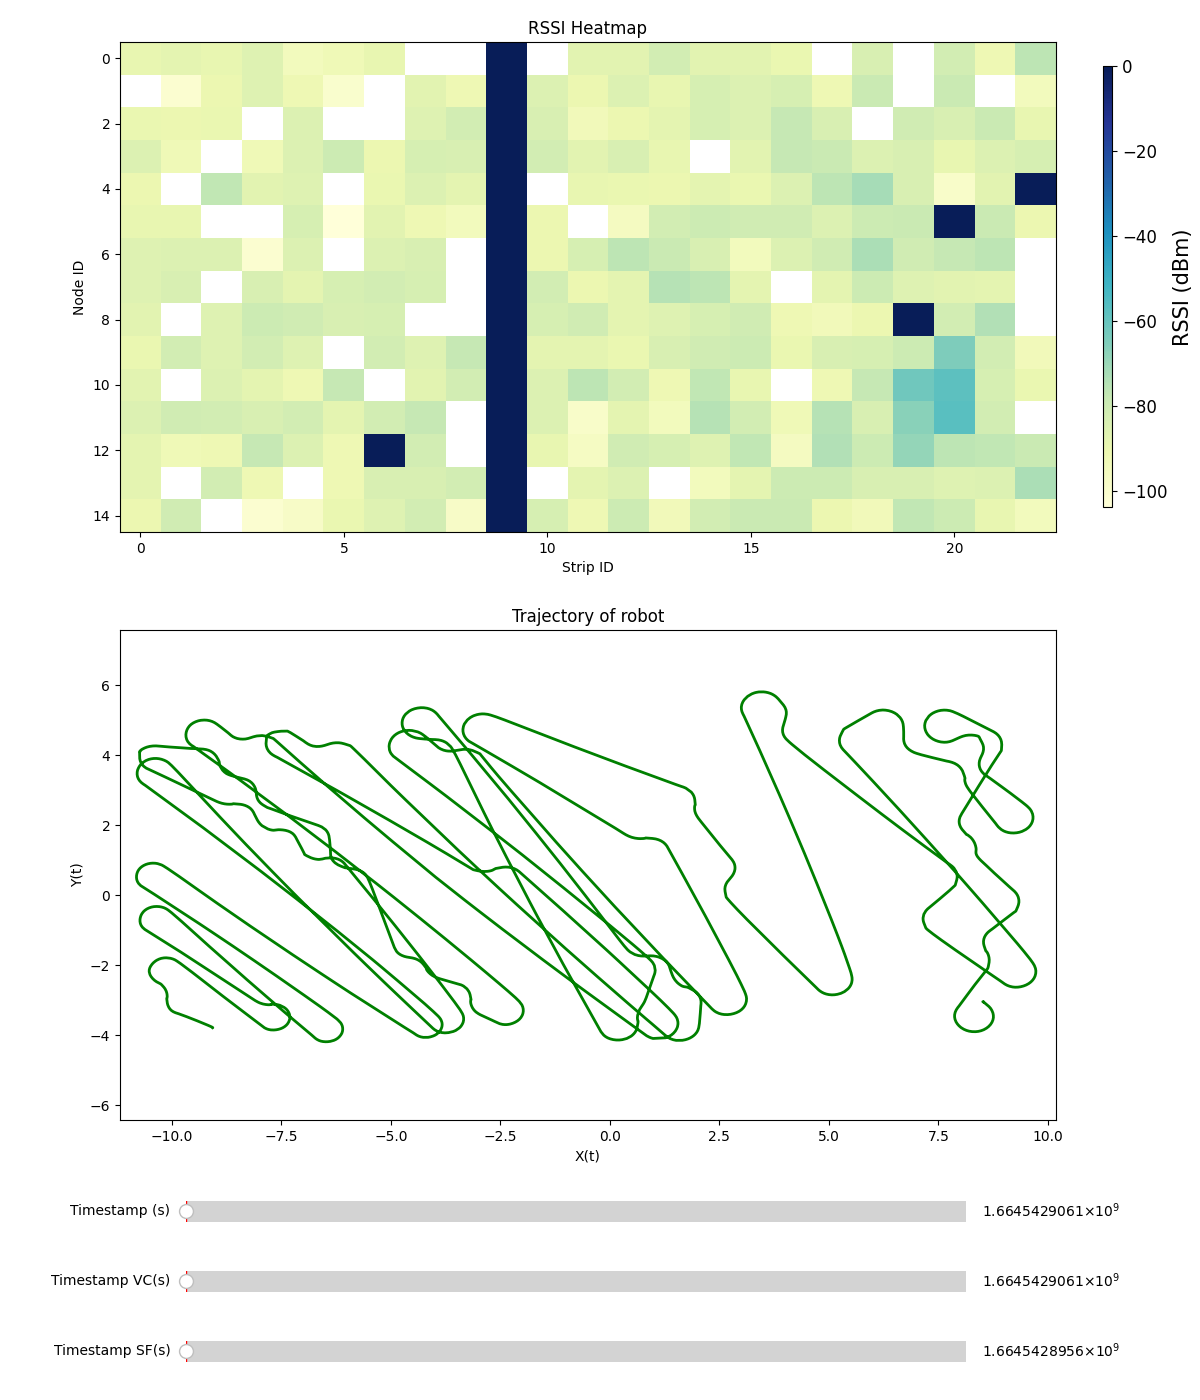

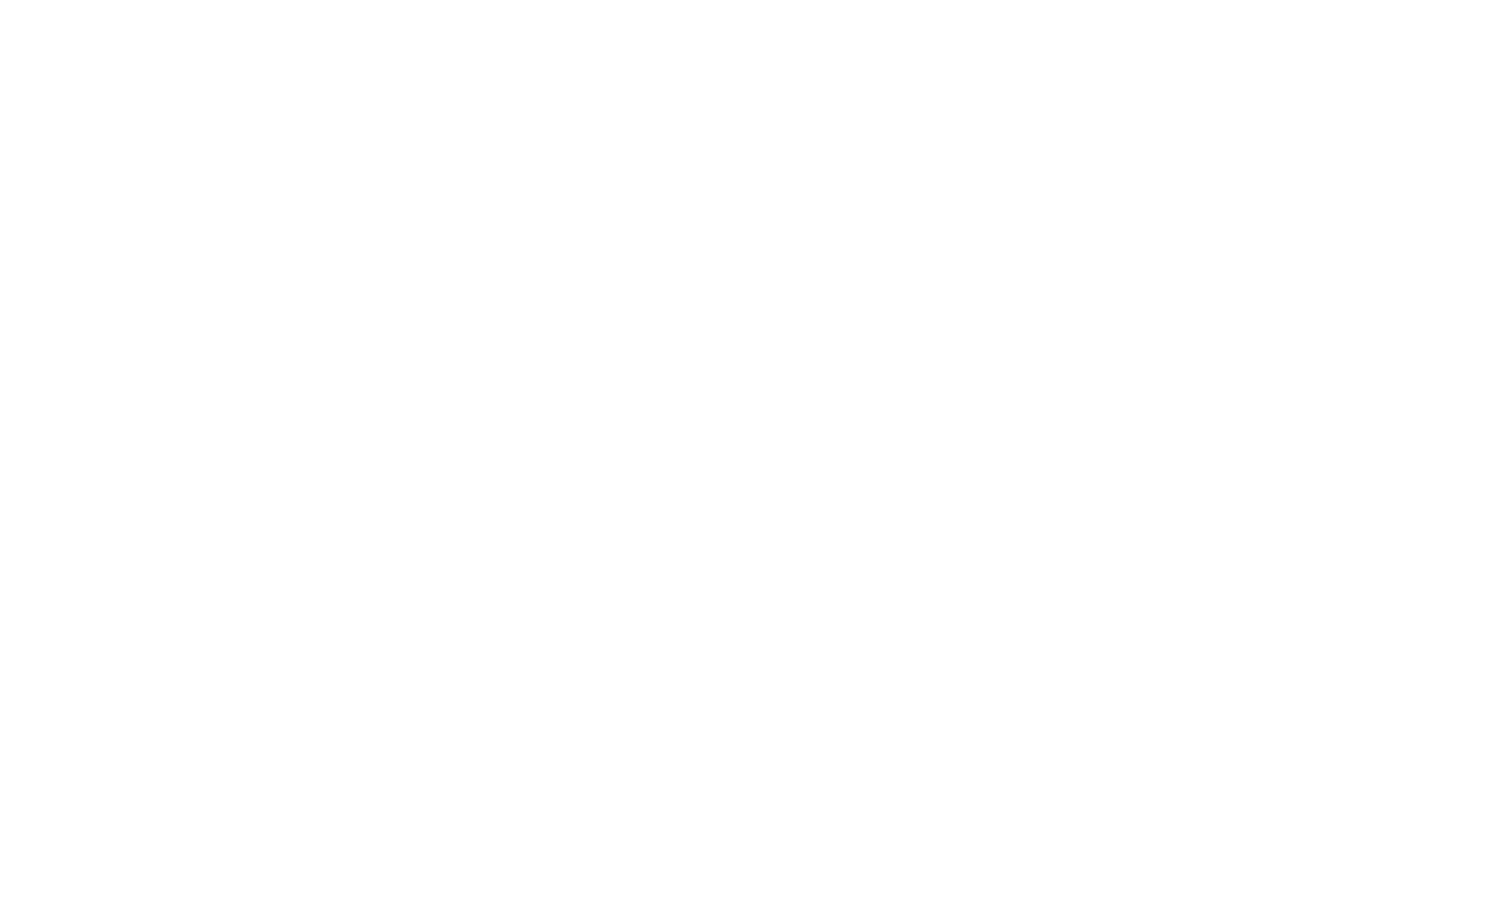

1664542906.7995396
1664542908.1191876
1664542909.0789316
1664542911.3583236
1664542912.0181477
1664542912.6179876
1664542912.9778917
1664542913.6377156
1664542914.2375557
1664542914.5974596
1664542915.2572837
1664542915.8571236
1664542916.5169477
1664542916.8768516
1664542917.5366757
1664542918.1365156
1664542918.7963398
1664542919.1562436
1664542919.7560837
1664542920.4159076
1664542920.7758117
1664542921.4356356
1664542922.0354757
1664542922.6952996
1664542923.0552037
1664542923.6550436
1664542924.3148677
1664542924.9746916
1664542925.2746117
1664542925.9344356
1664542926.5942597
1664542926.9541638
1664542927.5540037
1664542928.2138276
1664542928.8736517
1664542929.1735716
1664542929.8333957
1664542930.4932196
1664542931.1530437
1664542931.4529636
1664542932.1127877
1664542932.7726116
1664542933.0725317
1664542933.7323556
1664542934.3921797
1664542935.0520036
1664542935.3519237
1664542936.6715717
1664542937.3313956
1664542937.6313157
1664542938.2911396
1664542938.9509637
1664542939.2

In [61]:
#MERGE RSSI HEATMAP & VICON COORDINATES WITH SLIDER

#Heatmap animation over the time
from turtle import width
import matplotlib.animation as animation
%matplotlib ipympl
from matplotlib.widgets import Slider, Button, RadioButtons
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

#DEFINE DATASET ARRAY
x_sf = df_sf_final['strip_id'].to_numpy()
y_sf = df_sf_final['node_id'].to_numpy()
z_sf = df_sf_final['r'].to_numpy()
t_sf = df_sf_final['timestamp'].to_numpy()
dataSet_sf = np.array([x_sf, y_sf, z_sf, t_sf])
numDataPoints_sf = len(t_sf)
num_of_nodes = 15
num_of_strips = 23


#CREATE 3D ARRAY FOR HEATMAP
rssi_mat = np.empty((numDataPoints_sf,15,23))
timestamp_arr = np.empty((numDataPoints_sf,15,23))
fig = plt.figure(figsize=(15, 9))

for index in range(numDataPoints_sf):
    for node in range(num_of_nodes):
        for strip in range(num_of_strips):
            if node == int(dataSet_sf[1][index])-1 and strip == int(dataSet_sf[0][index])-1:
                rssi_mat[index][int(dataSet_sf[1][index])-1][int(dataSet_sf[0][index])-1] = (dataSet_sf[2][index])
                timestamp_arr[index][int(dataSet_sf[1][index])-1][int(dataSet_sf[0][index])-1] = (dataSet_sf[3][index])
            else:
                rssi_mat[index][node][strip] = rssi_mat[index-1][node][strip]
                timestamp_arr[index][node][strip] = timestamp_arr[index-1][node][strip]


numDataPoints_sf = dataSet_sf.shape[1]
# print("dataset sf:",dataSet_sf.shape, "rssi new: ", rssi_mat.shape)
# print(dataSet_sf)

delta_t_sf = round((t_sf.max()-t_sf.min())/numDataPoints_sf, 6)

#print("new t_sf:", t_sf, t_sf.shape, "x_sf:", x_sf.shape, "y_sf:", y_sf.shape, "z_sf:", z_sf.shape)

#-------------------------------------------------------------------------------------------------------------------#

#CREATE DATASET FOR VICON COORDINATES
t_vc = df_vicon_final['time'].to_numpy()
x_vc = df_vicon_final['X'].to_numpy()
y_vc = df_vicon_final['Y'].to_numpy()
dataSet_vc = np.array([x_vc, y_vc, t_vc])
numDataPoints_vc = len(t_vc)

print("dataset vc old:", dataSet_vc.shape)

numDataPoints_vc = dataSet_vc.shape[1]
# print("dataset vc:",dataSet_vc.shape)
# print(dataSet_vc)

delta_t_vc = round((t_vc.max()-t_vc.min())/numDataPoints_vc, 6)
#-------------------------------------------------------------------------------------------------------------------#

# GET SOME MATPLOTLIB OBJECTS
#fig, (ax1, ax2) = plt.subplots(figsize=(10,12), nrows=2)
fig = plt.figure(figsize=(12,14))
plt.subplots_adjust(bottom=0.25)


# AXES PROPERTIES RSSI HEATMAP
ax1 = fig.add_subplot(211) #(row, column, pos)
#ax1.set_autoscale_on
ax1.set_xlabel('Strip ID')
ax1.set_ylabel('Node ID')
ax1.set_title('RSSI Heatmap')

# # AXES PROPERTIES VICON COORDINATES
ax2 = fig.add_subplot(212)
ax2.set_xlim(-11.185, 10.185)
ax2.set_ylim(-6.425, 7.575)
ax2.set_xlabel('X(t)')
ax2.set_ylabel('Y(t)')
ax2.set_title('Trajectory of robot')


# Defining the Slider button
# xposition, yposition, width and height
ax_slide_sf = plt.axes([0.155, 0.02, 0.65, 0.03])
ax_slide_vc = plt.axes([0.155, 0.07, 0.65, 0.03])
ax_slide_merge = plt.axes([0.155, 0.12, 0.65, 0.03])


#DISPLAY INITIAL IMAGE
im_h = ax1.imshow(rssi_mat[numDataPoints_sf-1], cmap="YlGnBu", aspect='auto')
axins = inset_axes(ax1,
                   width="1%",  # width = 5% of parent_bbox width
                   height="90%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 1.25, 1, 1),
                   bbox_transform=ax2.transAxes,
                   borderpad=0,
                   )
cbar = plt.colorbar(im_h, cax=axins, ax=ax1)
cbar.set_label(label='RSSI (dBm)', size=15)
cbar.ax.tick_params(labelsize=12)


#cbar.ax.set_axes_locator
# #cbar.set_ticks()

line = ax2.plot(dataSet_vc[0], dataSet_vc[1], lw=2, c='g')[0] # For line plot


# Properties of the slider

#normal data
timestamp_rssi = Slider(ax_slide_sf, 'Timestamp SF(s)',
                  t_sf.min(), t_sf.max(), valinit=t_sf.min(), valstep=delta_t_sf)
timestamp_vc = Slider(ax_slide_vc, 'Timestamp VC(s)',
                  t_vc.min(), t_vc.max(), valinit=t_vc.min(), valstep=delta_t_vc)
timestamp_merge = Slider(ax_slide_merge, 'Timestamp (s)',
                  t_vc.min(), t_vc.max(), valinit=t_vc.min(), valstep=delta_t_vc)


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx


def update_heatmap(val):
    pos = timestamp_rssi.val
    index = find_nearest(dataSet_sf[3], pos)
    im_h.set_data(rssi_mat[index])

def update_coord(val):
    pos = timestamp_vc.val
    index = find_nearest(dataSet_vc[2], pos)
    line.set_xdata(dataSet_vc[0, :index])
    line.set_ydata(dataSet_vc[1, :index])

    #redrawing the figure
    fig.canvas.draw()    

def update_all(val):
    pos = timestamp_merge.val
    print(pos)
    index = find_nearest(dataSet_vc[2], pos)
    line.set_xdata(dataSet_vc[0, :index])
    line.set_ydata(dataSet_vc[1, :index])

    index2 = find_nearest(dataSet_sf[3], dataSet_vc[2][index])
    im_h.set_data(rssi_mat[index2])

    #redrawing the figure
    fig.canvas.draw() 

# Calling the function "update" when the value of the slider is changed
timestamp_rssi.on_changed(update_heatmap)
timestamp_vc.on_changed(update_coord)
timestamp_merge.on_changed(update_all)

#fig.tight_layout()
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.88, top=0.97, hspace=0.2)
#plt.subplots_adjust(left=0.155, bottom=0.2, right=0.91, top=0.97, hspace=0.2)
#plt.subplot_tool()
plt.show()

**Check the index of closest timestamp to Vicon Dataset**

In [65]:
timestamp_merge_arr = [t_vc[idx]+delta_t_vc if idx > 0 else t_vc[idx] for idx, x in enumerate(t_vc)]
print(len(timestamp_merge_arr), timestamp_merge_arr)

4222 [1664542906.1397157, 1664542906.2594557, 1664542906.316192, 1664542906.3794901, 1664542906.4388258, 1664542906.496041, 1664542906.5561466, 1664542906.6193676, 1664542906.6759582, 1664542906.7347224, 1664542906.7985432, 1664542906.854713, 1664542906.918006, 1664542906.97251, 1664542907.0398045, 1664542907.0968943, 1664542907.1523232, 1664542907.2158012, 1664542907.279734, 1664542907.339601, 1664542907.3960884, 1664542907.457471, 1664542907.5166414, 1664542907.5772514, 1664542907.6363635, 1664542907.6997397, 1664542907.7571998, 1664542907.8155487, 1664542907.8754342, 1664542907.932256, 1664542907.9965968, 1664542908.055333, 1664542908.1177669, 1664542908.176767, 1664542908.2346153, 1664542908.2997556, 1664542908.3564677, 1664542908.4139457, 1664542908.4785535, 1664542908.5392318, 1664542908.5979772, 1664542908.6520805, 1664542908.7165344, 1664542908.7743995, 1664542908.8359172, 1664542908.896668, 1664542908.9594986, 1664542909.0166035, 1664542909.076326, 1664542909.1377585, 16645429

In [68]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    #print(np.abs(array - value), len(np.abs(array - value)))
    return idx

timestamp_merge_arr = [t_vc[idx]+delta_t_vc for idx, x in enumerate(t_vc)]
#timestamp_merge_arr = [t_vc[idx]+delta_t_vc if idx > 0 else t_vc[idx] for idx, x in enumerate(t_vc)]

# index_vicon = find_nearest(dataSet_vc[2], timestamp_merge_arr[4])
# index_sf = find_nearest(dataSet_sf[3], dataSet_vc[2][index_vicon])

# print(index_vicon, index_sf)

# index_vicon = find_nearest(dataSet_vc[2], timestamp_merge_arr[5])
# index_sf = find_nearest(dataSet_sf[3], dataSet_vc[2][index_vicon])

#print(index_vicon, index_sf)
closest_index_vicon = []
closest_time_vicon = [] 
closest_index_sf = []
closest_time_sf = [] 
for i in range(len(timestamp_merge_arr)):
    pos = timestamp_merge_arr[i]
    #print(pos)
    index_vicon = find_nearest(dataSet_vc[2], pos)
    index_sf = find_nearest(dataSet_sf[3], dataSet_vc[2][index_vicon])
    closest_index_vicon.append(index_vicon)
    closest_time_vicon.append(dataSet_vc[2][index_vicon])
    closest_index_sf.append(index_sf)
    closest_time_sf.append(dataSet_sf[3][index_sf])
print(len(closest_index_sf), closest_index_sf)
print(len(closest_index_vicon), closest_index_vicon)
len(timestamp_merge_arr)

4222 [12638, 12717, 12807, 12891, 12976, 13061, 13149, 13229, 13314, 13404, 13484, 13574, 13653, 13750, 13832, 13909, 13999, 14089, 14173, 14254, 14342, 14428, 14513, 14599, 14689, 14771, 14852, 14938, 15018, 15110, 15195, 15283, 15369, 15452, 15544, 15626, 15707, 15799, 15887, 15972, 16046, 16136, 16221, 16307, 16394, 16482, 16566, 16650, 16736, 16819, 16904, 16993, 17079, 17169, 17250, 17338, 17422, 17501, 17595, 17672, 17760, 17853, 17931, 18022, 18103, 18190, 18274, 18363, 18445, 18531, 18613, 18703, 18789, 18871, 18951, 19044, 19130, 19221, 19307, 19386, 19474, 19557, 19644, 19727, 19812, 19903, 19987, 20072, 20157, 20228, 20328, 20412, 20499, 20572, 20664, 20754, 20841, 20919, 21007, 21098, 21182, 21264, 21355, 21435, 21523, 21604, 21693, 21778, 21861, 21949, 22033, 22119, 22205, 22293, 22373, 22461, 22541, 22631, 22720, 22806, 22892, 22979, 23062, 23150, 23236, 23314, 23402, 23491, 23576, 23658, 23742, 23830, 23915, 23998, 24087, 24168, 24260, 24344, 24430, 24502, 24601, 24679, 

4222

In [69]:
home_path = '/home/irfan-flw/6GEM/Coding/Vicon_Pos_Converter'
os.chdir(home_path)

df_t = np.array([timestamp_merge_arr, closest_index_vicon, closest_time_vicon, closest_index_sf, closest_time_sf])
df_t = df_t.transpose()


df_t = pd.DataFrame(df_t, columns=['timestamp_merge','index_vc','time_vc','index_sf','time_sf'])
df_t.to_csv('test_t.csv')
df_t

,timestamp_merge,index_vc,time_vc,index_sf,time_sf
0,1.664543e+09,1.0,1.664543e+09,12638.0,1.664543e+09
1,1.664543e+09,2.0,1.664543e+09,12717.0,1.664543e+09
2,1.664543e+09,3.0,1.664543e+09,12807.0,1.664543e+09
3,1.664543e+09,4.0,1.664543e+09,12891.0,1.664543e+09
4,1.664543e+09,5.0,1.664543e+09,12976.0,1.664543e+09
...,...,...,...,...,...
4217,1.664543e+09,4218.0,1.664543e+09,373473.0,1.664543e+09
4218,1.664543e+09,4219.0,1.664543e+09,373563.0,1.664543e+09
4219,1.664543e+09,4220.0,1.664543e+09,373650.0,1.664543e+09
4220,1.664543e+09,4221.0,1.664543e+09,373726.0,1.664543e+09


In [36]:
df_t.to_csv('test_t.csv')

In [11]:
# # threshold_sf_up = 1663337798.499045
# #threshold_sf_low = 1664539382.5109046
# closest_index_sf2 = []
# for i in range(numDataPoints_vc):
#     pos = t_vc[i]
#     #print(pos)

#     index_sf = find_nearest(dataSet_sf[3], pos)
#     closest_index_sf2.append(index_sf)
# print(len(closest_index_sf2), closest_index_sf2)

5630 [10910, 9672, 11998, 10779, 13743, 15526, 12281, 12713, 10385, 15039, 13183, 11587, 10368, 12394, 16429, 15191, 15847, 14291, 14029, 15341, 16749, 15848, 11047, 16562, 11516, 13504, 12566, 11966, 12755, 14967, 17013, 12268, 12643, 13656, 14968, 15138, 13863, 13601, 14313, 16340, 15101, 15533, 15571, 14371, 13114, 15365, 18443, 13978, 12740, 16962, 18273, 17017, 16906, 17581, 13097, 17675, 18369, 13942, 13624, 16044, 18275, 17094, 16157, 18915, 16607, 17677, 18428, 15557, 19422, 19478, 19892, 17660, 15482, 15634, 17623, 15052, 19012, 17154, 19819, 18880, 18655, 16780, 14867, 20757, 17606, 17719, 15429, 20082, 18864, 20552, 19557, 20647, 18770, 17513, 15976, 21285, 18339, 19785, 18547, 15958, 16314, 19991, 19035, 17197, 16578, 19617, 19655, 19954, 18792, 17273, 20238, 20256, 17085, 20144, 17274, 17650, 20800, 19694, 20145, 18926, 20596, 22922, 22979, 21441, 20203, 18590, 22624, 23018, 19096, 20541, 17914, 22549, 21405, 21424, 23731, 23526, 18611, 21217, 19098, 21106, 19548, 20619, 2

In [54]:
home_path = '/home/irfan-flw/6GEM/Coding/Vicon_Pos_Converter'
os.chdir(home_path)
# plt.savefig(path_vicon + dataset_name + '.png', dpi=300)

**CREATE FRAME FOR MERGED DATASET**

In [71]:
df_sf_assoc = df_sf_final.iloc[closest_index_sf].reset_index(drop=True)
df_sf_assoc

,strip_id,node_id,ax,ay,az,gx,gy,gz,mx,my,mz,r,timestamp
0,19,10,0.063721,0.118652,1.086670,-0.854962,0.396947,0.541985,165.30,90.90,28.80,-86.0,1.664543e+09
1,6,13,0.049072,0.086182,0.997559,-2.816794,0.404580,1.221374,55.80,-9.45,151.50,-97.0,1.664543e+09
2,21,2,0.049805,0.160889,1.019775,-1.519084,2.641221,-0.404580,148.65,-99.15,-124.95,-84.0,1.664543e+09
3,21,13,0.036865,0.112061,1.037842,0.267176,1.045802,1.297710,37.35,-22.35,-6.15,-88.0,1.664543e+09
4,6,10,0.073730,0.102051,1.004639,-0.496183,1.358779,0.832061,57.30,-92.85,-220.20,-79.0,1.664543e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4217,18,4,0.006836,0.128906,0.966553,0.259542,0.770992,1.175573,9.15,38.10,-108.00,-80.0,1.664543e+09
4218,1,15,0.047119,0.105713,1.105713,0.045802,1.389313,-0.244275,40.50,-32.85,20.70,-91.0,1.664543e+09
4219,2,12,0.036621,0.183838,0.985352,-0.732824,1.183206,0.435115,63.00,19.80,-76.35,-82.0,1.664543e+09
4220,3,15,0.112549,0.102783,0.987061,0.175573,1.190840,1.122137,34.65,19.50,-91.20,NaN,1.664543e+09


In [56]:
# df_sf_assoc.to_csv('result_sf_associate.csv')

In [57]:
# #CREATE ARRAY FOR DATA SENSORS
# from tqdm import tqdm_notebook as tqdm


# path = "/home/irfan-flw/6GEM/Coding/Vicon_Pos_Converter"

# os.chdir(path)

# KEYS = ['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'mx', 'my', 'mz', 'r', 'timestamp']
# Vicon_Coords = pd.read_csv("vicon_node_positions.csv")
# df_data = Vicon_Coords[['strip_id','node_id']]
# df_data = df_data.astype('int32')

# #CREATE 4D ARRAY

# X = np.zeros([23, 15, 11])


# # init_frame()
# def generate_frame(X):
#     X_df = X.reshape([345,11])
#     df_X = pd.DataFrame(X_df, columns=KEYS)
#     df_data[['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'mx', 'my', 'mz', 'r', 'timestamp']] = df_X
#     #df_X[['strip_id','node_id']] = strip_node_df

#     #print(df_data)
#     frame_i = df_data.to_json(orient='columns')
#     #print(frame_i)

#     return frame_i


# def get_data_from_data_frame(df_data):
#     #X = np.zeros([23, 15, 11])
#     #frame = {}
#     for i, key in enumerate(KEYS):
#         X[int(df_data.strip_id) - 1, int(df_data.node_id) - 1, i] = df_data[key]
    
#     frame = generate_frame(X)
#     # X_df = X_df.reshape([345,11])
#     # df_X = pd.DataFrame(X_df, columns=KEYS)
#     #print(df_X)
#     t = df_data.timestamp

#     return X, t, frame

# def build_sensor_array(df):

#     X = np.zeros([len(df), 23, 15, 11])
#     t = np.zeros([len(df), 1])
#     frames = []

#     # Generate a single frame for each row
#     for index, row in tqdm(df.T.items(), total=len(df)):

#         df_i = row
        
#         X_i, t_i, frame_i = get_data_from_data_frame(df_i)
#         X[index] = X_i
#         t[index] = t_i
#         frames.append(frame_i)
#         #print(X[index])
    
#     return X, t, frames

# sensor_data, t_data, frames = build_sensor_array(df_sf_final)

# print(sensor_data.shape, t_data.shape, len(frames))

**CREATE ARRAY FOR DATA SENSORS**

In [72]:
#CREATE ARRAY FOR DATA SENSORS
from tqdm import tqdm_notebook as tqdm


path = "/home/irfan-flw/6GEM/Coding/Vicon_Pos_Converter"

os.chdir(path)

KEYS = ['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'mx', 'my', 'mz', 'r', 'timestamp']
Vicon_Coords = pd.read_csv("vicon_node_positions.csv")
df_data = Vicon_Coords[['strip_id','node_id']]
df_data = df_data.astype('int32')

X = np.zeros([len(df_sf_assoc), 23, 15, 11])
t = np.zeros([len(df_sf_assoc), 1])
#frames = []
frames = []

X_i = np.zeros([23, 15, 11])

for index, row in tqdm(df_sf_assoc.T.items(), total=len(df_sf_assoc)):
#for index, row in df_sf_assoc.T.items():

    df_i = row

    for i, key in enumerate(KEYS):
        X_i[int(df_i.strip_id) - 1, int(df_i.node_id) - 1, i] = df_i[key]
    
    X_df = X_i.reshape([345,11])
    df_X = pd.DataFrame(X_df, columns=KEYS)
    df_data[['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'mx', 'my', 'mz', 'r', 'timestamp']] = df_X
    frame_i = df_data.to_json(orient='columns')
    
    t_i = df_i.timestamp

    X[index] = X_i
    t[index] = t_i
    #frames.insert(index, frame_i)
    frames.append(frame_i)
    #print(index,'/',len(df_sf_final))

# #CREATE 4D ARRAY
print(X.shape, t.shape, len(frames))

/tmp/ipykernel_5327/41177457.py:21: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for index, row in tqdm(df_sf_assoc.T.items(), total=len(df_sf_assoc)):


  0%|          | 0/4222 [00:00<?, ?it/s]

(4222, 23, 15, 11) (4222, 1) 4222


**Check index of timestamp threshold**

In [73]:
#Filter out the array - Uncomment if necessary

# def closest_timestamp(array, value):
#     array = np.asarray(array)
#     idx = (np.abs(array - value)).argmin()
#     return idx

# index_low_X = closest_timestamp(t, threshold_sf_low)
# index_low_vc = closest_timestamp(dataSet_vc[2], threshold_sf_low)
# #index_up_X = closest_timestamp(t_data, threshold_sf_up)
# #index_up_vc = closest_timestamp(dataSet_vc[2], threshold_sf_up)

# print(index_low_X, index_low_vc)

# sensor_data_final = X[index_low_X:]
# t_data_final = t[index_low_X:]
# frames_final = frames[index_low_X:]
# dataSet_vc_final = dataSet_vc[:,index_low_vc:]
# dataSet_vc_final = np.transpose(dataSet_vc_final)

sensor_data_final = X[:]
t_data_final = t[:]
frames_final = frames[:]
dataSet_vc_final = dataSet_vc[:,:]
dataSet_vc_final = np.transpose(dataSet_vc_final)


print(sensor_data_final.shape, t_data_final.shape, len(frames_final), dataSet_vc_final.shape)

(4222, 23, 15, 11) (4222, 1) 4222 (4222, 3)


In [74]:
#MERGE DATASET

#dataSet_vc_final = np.transpose(dataSet_vc_final)
frame_number = np.empty(dataSet_vc_final.shape[0], dtype=object)
frame_data = np.empty(dataSet_vc_final.shape[0], dtype=object)
frame_count = 0
for row in range(dataSet_vc_final.shape[0]):
    time_vc = dataSet_vc[2][row]
    #index_vc = closest_timestamp(dataSet_vc[2], time_vc)
    #index_sf = closest_timestamp(t_data_final, time_vc)

    frame_number[row] = str(frame_count)
    frame_data[row] = frames_final[row]
    frame_count += 1

In [61]:
# array_frame_vc = dataSet_vc_final.astype(object)

In [62]:
# array_frame_vc.shape

**GENERATES THE DATASET AS .CSV FILE**

In [75]:
array_frame_vc = dataSet_vc_final.astype(object)

dataSet_final = np.array([frame_number, array_frame_vc[:,0], array_frame_vc[:,1], frame_data])
dataSet_final = np.transpose(dataSet_final)
#dataSet_final.shape
frame_sf = pd.DataFrame(dataSet_final, columns=['frame_number','vicon_x','vicon_y','data'])

path_dataset = '/media/irfan-flw/DATA/Arbeit/6GEM/Program_Development/6GEM_Dataset/Dataset_Sensor_Floor_Final/30092022/'

os.chdir(path_dataset)

frame_sf.to_csv(r'/media/irfan-flw/DATA/Arbeit/6GEM/Program_Development/6GEM_Dataset/Dataset_Sensor_Floor_Final/30092022/' +  dataset_name + '.csv', index=False)

#data_dir = '../Dataset_sensor_floor/Dataset_Final/30092022/'
#csv_name = data_dir + 'dataset_3009022_' + dataset_name + '.csv'
# csv_name = path_dataset + dataset_name + '.csv'
# frame_sf.to_csv(csv_name, index=False)
dataSet_final

array([['0', -9.066444725595414, -3.788293798745363,
        '{"strip_id":{"0":1,"1":1,"2":1,"3":1,"4":1,"5":1,"6":1,"7":1,"8":1,"9":1,"10":1,"11":1,"12":1,"13":1,"14":1,"15":2,"16":2,"17":2,"18":2,"19":2,"20":2,"21":2,"22":2,"23":2,"24":2,"25":2,"26":2,"27":2,"28":2,"29":2,"30":3,"31":3,"32":3,"33":3,"34":3,"35":3,"36":3,"37":3,"38":3,"39":3,"40":3,"41":3,"42":3,"43":3,"44":3,"45":4,"46":4,"47":4,"48":4,"49":4,"50":4,"51":4,"52":4,"53":4,"54":4,"55":4,"56":4,"57":4,"58":4,"59":4,"60":5,"61":5,"62":5,"63":5,"64":5,"65":5,"66":5,"67":5,"68":5,"69":5,"70":5,"71":5,"72":5,"73":5,"74":5,"75":6,"76":6,"77":6,"78":6,"79":6,"80":6,"81":6,"82":6,"83":6,"84":6,"85":6,"86":6,"87":6,"88":6,"89":6,"90":7,"91":7,"92":7,"93":7,"94":7,"95":7,"96":7,"97":7,"98":7,"99":7,"100":7,"101":7,"102":7,"103":7,"104":7,"105":8,"106":8,"107":8,"108":8,"109":8,"110":8,"111":8,"112":8,"113":8,"114":8,"115":8,"116":8,"117":8,"118":8,"119":8,"120":9,"121":9,"122":9,"123":9,"124":9,"125":9,"126":9,"127":9,"128":9,"12